Project Title: **New York City Taxi Trip Duration Prediction**
<br> Student Id: 
- **0241521**

# Business Problem

### Introduction
The New York City Taxi Trip Duration dataset is used to predict the trip duration.
In this I will use Python programming language, Data Visualization libraries such as matplotlib and seaborn, and different SKLearn ML algorithm to to explore data, visulaze data and make prediction. 

 
### File descriptions

train.csv - the training set (contains 1458644 trip records)

test.csv - the testing set (contains 625134 trip records)

sample_submission.csv - a sample submission file in the correct format

### Data fields
**Independent Variables**
- id — a unique identifier for each trip
- vendor_id — a code indicating the provider associated with the trip record
- pickup_datetime — date and time when the meter was engaged
- dropoff_datetime — date and time when the meter was disengaged
- passenger_count — the number of passengers in the vehicle (driver entered value)
- pickup_longitude — the longitude where the meter was engaged
- pickup_latitude — the latitude where the meter was engaged
- dropoff_longitude — the longitude where the meter was disengaged
- dropoff_latitude — the latitude where the meter was disengaged
- store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
 

**Target Variable**
- trip_duration — duration of the trip in seconds


**Objectives**

At the end, we will answer the follwoing question:
1. What would be the next year busiest day in 2021?
2. Predict the number of trips per hour on daily basis and explanations about the change.
3. Predict the effect of  ustomer location (pickup/drop-off) on the duration of taxi trip duration.

# Import Libraries

In [1]:
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np        #linear algebra

In [2]:
#data visualisation
import seaborn as sns     
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from datetime import timedelta
import datetime as dt
import math

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings; warnings.simplefilter('ignore') # to disable Python warnings

# Import Dataset

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Data Exploration

In [6]:
print(df_train.shape)
print(df_test.shape)

(1048575, 11)
(625134, 9)


In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048575 non-null  object 
 1   vendor_id           1048575 non-null  int64  
 2   pickup_datetime     1048575 non-null  object 
 3   dropoff_datetime    1048575 non-null  object 
 4   passenger_count     1048575 non-null  int64  
 5   pickup_longitude    1048575 non-null  float64
 6   pickup_latitude     1048575 non-null  float64
 7   dropoff_longitude   1048575 non-null  float64
 8   dropoff_latitude    1048575 non-null  float64
 9   store_and_fwd_flag  1048575 non-null  object 
 10  trip_duration       1048575 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 88.0+ MB
None


In [8]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB
None


Another important question to get to know the data is the structure concerning missingness. 
 - Are there many values gone missing or is the dataset complete?


In [9]:
df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

no missing values in the data set

it's maybe also interesting to have a look on the raw data

In [10]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-16 17:24,14-03-16 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-16 0:43,12-06-16 0:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-16 11:35,19-01-16 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-16 19:32,06-04-16 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-16 13:30,26-03-16 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
df_test.tail()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N
625133,id0621643,2,2016-01-01 00:00:22,2,-73.981850,40.716881,-73.969330,40.769379,N


In [12]:
#Check columns in train columns that are not included in test columns
print([column for column in df_train.columns if column not in df_test.columns])

['dropoff_datetime', 'trip_duration']


Neither 'dropoff_datetime' nor 'trip_duration' should in test data.



In [13]:
# Let's check duplicate values
len(df_train['id'].value_counts()) == len(df_train)


True

There is no duplicate id in the train data



In [14]:
df_train.nunique()

id                    1048575
vendor_id                   2
pickup_datetime        237127
dropoff_datetime       237442
passenger_count            10
pickup_longitude        21382
pickup_latitude         42587
dropoff_longitude       30924
dropoff_latitude        58292
store_and_fwd_flag          2
trip_duration            6883
dtype: int64

- It shows that id has 1048575 unique values which are equal to the number of rows in our dataset.
- There are 2 unique vendor ids.
- There are  unique passenger counts.
- There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

In [15]:
# Let's check the range of attributes
print('----------------Distance-------------------')
print('Latitude : {} to {}'.format(
    max(df_train.pickup_latitude.min(), df_train.dropoff_latitude.min()),
    max(df_train.pickup_latitude.max(), df_train.dropoff_latitude.max())
))
print('Longitude : {} to {}'.format(
    max(df_train.pickup_longitude.min(), df_train.dropoff_longitude.min()),
    max(df_train.pickup_longitude.max(), df_train.dropoff_longitude.max())
))
print('')
print('------------------Time---------------------')
print('Trip duration in seconds: {} to {}'.format(df_train.trip_duration.min(), 
                                                  df_train.trip_duration.max()))

print('')
print('------------------Date ---------------------')
print('Datetime range: {} to {}'.format(df_train.pickup_datetime.min(), 
                                        df_train.dropoff_datetime.max()))
print('')
print('----------------Passengers ------------------')
print('Passengers: {} to {}'.format(df_train.passenger_count.min(), 
                                    df_train.passenger_count.max()))

----------------Distance-------------------
Latitude : 34.35969543 to 51.88108444
Longitude : -78.54740143 to -61.33552933

------------------Time---------------------
Trip duration in seconds: 1 to 3526282

------------------Date ---------------------
Datetime range: 01-01-16 0:00 to 31-05-16 9:59

----------------Passengers ------------------
Passengers: 0 to 9


**Sattistical Summary**
>Let's finally check for a statistical summary of NYC Taxi Trip Duration dataset.

In [16]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.534503e+00,1.664382e+00,-7.397342e+01,4.075094e+01,-7.397336e+01,4.075183e+01,9.621448e+02
std,4.988084e-01,1.314261e+00,4.280165e-02,3.381389e-02,4.274282e-02,3.645002e-02,5.853002e+03
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.435970e+01,-7.981798e+01,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399186e+01,4.073738e+01,-7.399131e+01,4.073594e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075415e+01,-7.397973e+01,4.075455e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396731e+01,4.076836e+01,-7.396301e+01,4.076984e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.391176e+01,3.526282e+06


Note that this function can provide statistics for numerical features only.

Some insights from the above summary:

- Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.
- Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.
- The Maximum trip duration is very high 3526282 seconds (979.5227778 hrs), I will consider only trip duration of 2.77 hrs (10000 seconds)
- The minimum trip duration is also quite low.

<br> I will explore these in Univariate Analysis in detail.

# Step 4: Data Preprocessing

### Feature Analysis
#### Univariate Features

In [17]:
df_train['vendor_id'].value_counts()

2    560466
1    488109
Name: vendor_id, dtype: int64

In [18]:
df_train['store_and_fwd_flag'].value_counts()

N    1042766
Y       5809
Name: store_and_fwd_flag, dtype: int64

In [19]:
def convert_binary_variable(df):
    df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')
    return df
df_train = convert_binary_variable(df_train)
df_test = convert_binary_variable(df_test)

both 'vendor_id' and 'store_and_fwd_flag' are binary variable

change the target label into logaritmic transformation as the evaluation metric is RMSLE and plot the distribution either it is normal distribution or not

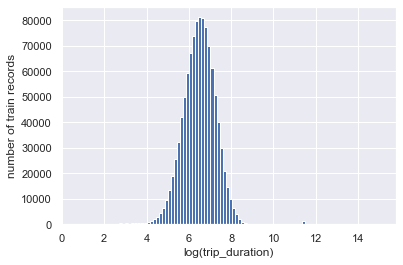

In [20]:
sns.set()
df_train['log_trip_duration'] = np.log(df_train['trip_duration'].values + 1)

plt.hist(df_train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [21]:
upper_limit = np.percentile(df_train['log_trip_duration'],99.99)
lower_limit = np.percentile(df_train['log_trip_duration'],0.01)
df_train_filter = df_train[(df_train['log_trip_duration'] <= upper_limit) & (df_train['log_trip_duration'] >= lower_limit) ]
print(len(df_train_filter))

1048446


In [22]:
df_train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int32
trip_duration           int64
log_trip_duration     float64
dtype: object

since the datatype of the pickup_datetime, dropoff_datetime are object, we change them into datetime.

#### Conversion Of Datatype

In [23]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["dropoff_datetime"])

df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"])

In [24]:
from tqdm.auto import tqdm   # progressbar decorator for iterators
tqdm.pandas()

In [25]:
df_train["year"] = df_train["pickup_datetime"].progress_apply(lambda x: x.year)
df_train["month"] = df_train["pickup_datetime"].progress_apply(lambda x: x.month)
df_train["day"] = df_train["pickup_datetime"].progress_apply(lambda x: x.day)
df_train["hour"] = df_train["pickup_datetime"].progress_apply(lambda x: x.hour)
df_train["minute"] = df_train["pickup_datetime"].progress_apply(lambda x: x.minute)

df_test["year"] = df_test["pickup_datetime"].progress_apply(lambda x: x.year)
df_test["month"] = df_test["pickup_datetime"].progress_apply(lambda x: x.month)
df_test["day"] = df_test["pickup_datetime"].progress_apply(lambda x: x.day)
df_test["hour"] = df_test["pickup_datetime"].progress_apply(lambda x: x.hour)
df_test["minute"] = df_test["pickup_datetime"].progress_apply(lambda x: x.minute)

In [26]:
def convert_datetime(df):
    '''
    convert datetime in string format to datetime object
    '''
    df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
    df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.date
    df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.weekday
    df.loc[:, 'pickup_weekofyear'] = df['pickup_datetime'].dt.isocalendar().week

    return df

In [27]:
df_train = convert_datetime(df_train )
df_test = convert_datetime(df_test)

In [28]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,year,month,day,hour,minute,pickup_date,pickup_weekday,pickup_weekofyear
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,0,455,6.122493,2016,3,14,17,24,2016-03-14,0,11
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6.498282,2016,12,6,0,43,2016-12-06,1,49
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,7.661527,2016,1,19,11,35,2016-01-19,1,3
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6.063785,2016,6,4,19,32,2016-06-04,5,22
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,0,435,6.077642,2016,3,26,13,30,2016-03-26,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,id0002921,1,2016-06-04 14:16:00,2016-06-04 14:20:00,1,-73.973015,40.760948,-73.976387,40.755604,0,207,5.337538,2016,6,4,14,16,2016-06-04,5,22
1048571,id1329189,2,2016-03-24 01:26:00,2016-03-24 01:38:00,1,-73.985550,40.727257,-73.957039,40.712387,0,740,6.608001,2016,3,24,1,26,2016-03-24,3,12
1048572,id0408460,1,2016-02-23 16:38:00,2016-02-23 16:48:00,1,-73.972038,40.750202,-73.998360,40.733360,0,605,6.406880,2016,2,23,16,38,2016-02-23,1,8
1048573,id0147762,1,2016-05-24 07:20:00,2016-05-24 07:25:00,1,-73.993332,40.724342,-74.004250,40.707470,0,287,5.662960,2016,5,24,7,20,2016-05-24,1,21


## Which time frame is considered in the dataset?


In [29]:
print("df_train: {}".format(df_train["year"].unique()))
print("df_test: {}".format(df_test["year"].unique()))

df_train: [2016]
df_test: [2016]


the datasets focus only the year 2016

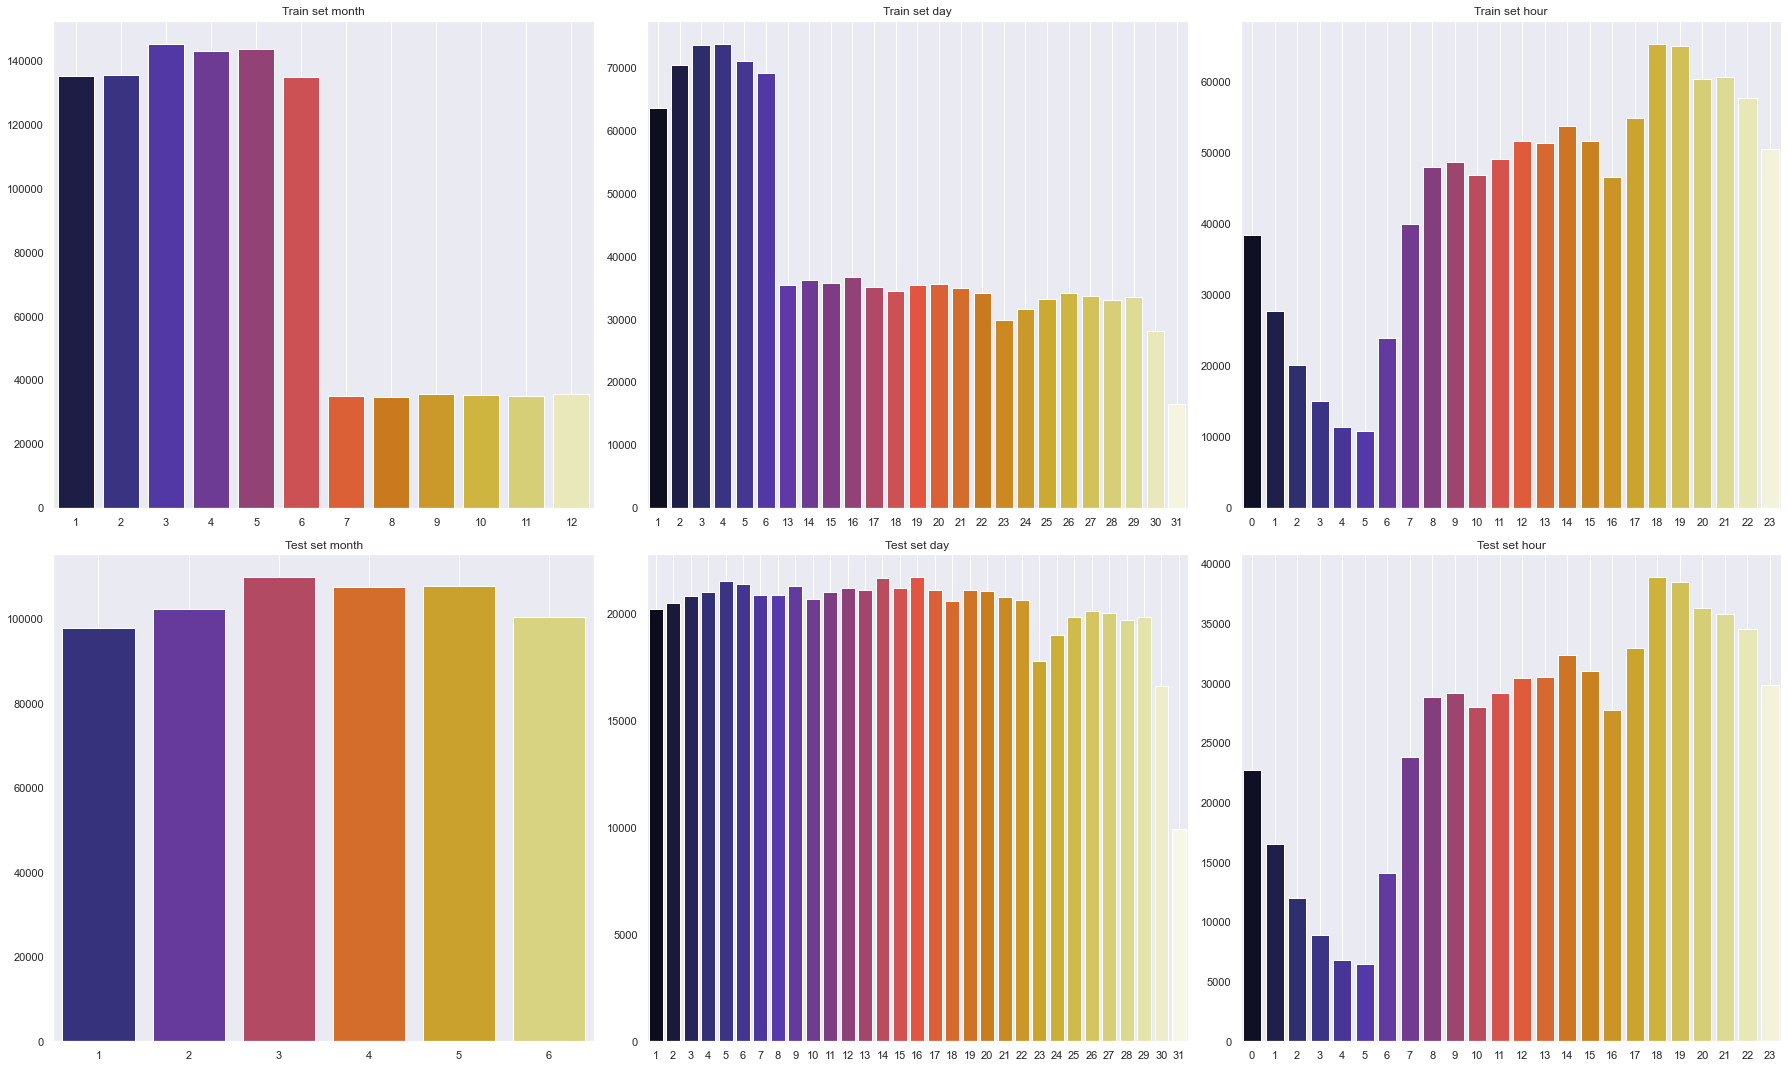

In [30]:
fig, sub = plt.subplots(2,3,figsize=(25,15))
counter = 0

for feat, subplot in zip(["month","day","hour","month","day","hour"], sub.flatten()):
    
    if counter<3:
        sns.barplot(x=df_train[feat].value_counts().index, y = df_train[feat].value_counts().values, ax= subplot, palette="CMRmap")
        subplot.grid()
        subplot.set_title("Train set {}".format(feat))
    else:
        sns.barplot(x=df_test[feat].value_counts().index, y = df_test[feat].value_counts().values, ax= subplot, palette="CMRmap")
        subplot.grid()
        subplot.set_title("Test set {}".format(feat))
    
    counter+=1
    
fig.tight_layout()

- all records are from the year 2016 and regarding the months the rides took place between January and June 2016
- the rides are approx. equally distributed to the days per months. however at the end of the month there are fewer rides
- regarding the time of the day, most of the clients have been driven between 18 - 23 h and the least has been transported between 0 and 6 h

#### Bivariate Analysis

In [31]:
def get_stats_describe(df,feature1,feature2):
    biv_columns = df.groupby([feature1])[[feature2]].agg(['size','mean','median','var','std']).reset_index()
    biv_columns = biv_columns.round(3)
    biv_columns.columns = [feature1,'size','mean','median','var','std']
    biv_columns = biv_columns.set_index(feature1)
    return biv_columns

In [32]:
df_train_date = get_stats_describe(df_train,'pickup_date','log_trip_duration')
df_train_weekday = get_stats_describe(df_train,'pickup_weekday','log_trip_duration')
df_train_hour = get_stats_describe(df_train,'hour','log_trip_duration')

Text(0.5, 0, 'Date')

<Figure size 7500x4500 with 0 Axes>

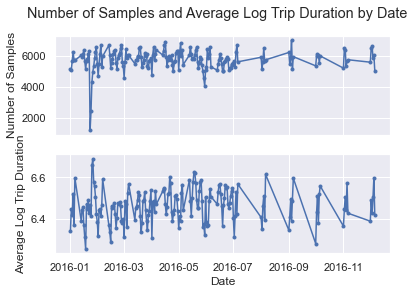

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(25, 15), dpi=300)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=False)
ax[0].plot(df_train_date[["size"]],".-")
fig.suptitle("Number of Samples and Average Log Trip Duration by Date")
ax[0].set_ylabel('Number of Samples')

ax[1].plot(df_train_date[["mean"]],".-")
ax[1].set_ylabel('Average Log Trip Duration')
ax[1].set_xlabel('Date')

Text(0.5, 0, 'Day of the Week')

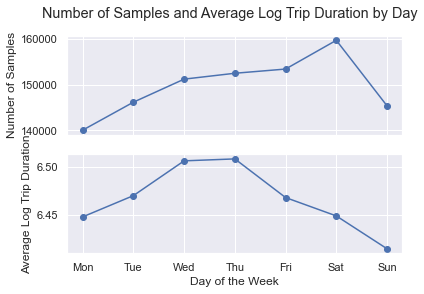

In [34]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=False)
ax[0].plot(df_train_weekday[["size"]],"o-")
fig.suptitle("Number of Samples and Average Log Trip Duration by Day")
ax[0].set_ylabel('Number of Samples')

ax[1].plot(df_train_weekday[["mean"]],"o-")
ax[1].set_ylabel('Average Log Trip Duration')
ax[1].set_xticklabels(["","Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax[1].set_xlabel('Day of the Week')

Text(0.5, 0, 'Hour of the Day')

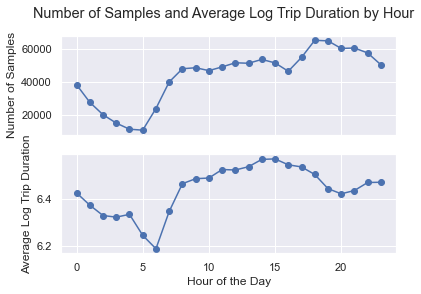

In [35]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=False)
ax[0].plot(df_train_hour[["size"]],"o-")
fig.suptitle("Number of Samples and Average Log Trip Duration by Hour")
ax[0].set_ylabel('Number of Samples')

ax[1].plot(df_train_hour[["mean"]],"o-")
ax[1].set_ylabel('Average Log Trip Duration')
ax[1].set_xlabel('Hour of the Day')

Morning rush hour is around 7:00 am. Trip volume largely increased after 4 pm and peaked around 6pm.

## Which distances are travelled?

#### Distance Vs Trip Duration(Haversine Distance)

**Use Haversine distance to calculate latitude and longitude distance**#### 

Based off exploratory data analysis on kaggle, the distance (km) between pickup and dropoff points is a significant feature impacting trip duration. Let's calculate the distance and investigate its patterns by using haversine formula.

s=rθ
 
where  r  is the Earth's radius, and  θ  is the central angle calculated as

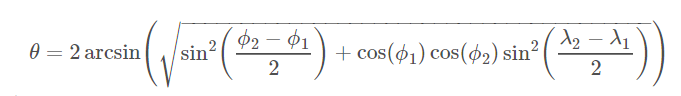 
with:

ϕ=latitude

λ=longitude

In [36]:
def haversine_distance(lat1, long1, lat2, long2):
    # the unit is in km
    #r = Average of earth radius
    lat1, long1, lat2, long2 = map(np.radians, (lat1, long1, lat2, long2))
    r = 6371 
    lat = lat2 - lat1
    long = long2 - long1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(long * 0.5) ** 2
    h = 2 * r * np.arcsin(np.sqrt(d))
    return h

In [37]:
def get_distance(df):
    df.loc[:, 'distance_haversine'] = haversine_distance(df['pickup_latitude'].values, \
                                                      df['pickup_longitude'].values, \
                                                      df['dropoff_latitude'].values, \
                                                      df['dropoff_longitude'].values)
    
    return df

df_train = get_distance(df_train)
df_test = get_distance(df_test)

## Where do the rides take exactly place?

In [38]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,log_trip_duration,year,month,day,hour,minute,pickup_date,pickup_weekday,pickup_weekofyear,distance_haversine
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,0,...,6.122493,2016,3,14,17,24,2016-03-14,0,11,1.498521
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,0,...,6.498282,2016,12,6,0,43,2016-12-06,1,49,1.805508
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,0,...,7.661527,2016,1,19,11,35,2016-01-19,1,3,6.385099
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6.063785,2016,6,4,19,32,2016-06-04,5,22,1.485499
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,0,...,6.077642,2016,3,26,13,30,2016-03-26,5,12,1.188589


Map where the passengers have been picked up (blue) and dropped off (red)

In [39]:
# install folium.... pip install folium
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in df_train.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)


display(mapa)

- the rides take place in the newyork region with focus on manhattan
- some passengers set out to be dropped off in areas outside newyork or the airport

In [40]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in df_train[df_train["distance_haversine"]>20].sample(200).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)


display(mapa)

many of the ride > 20 are rides to the or from the airports


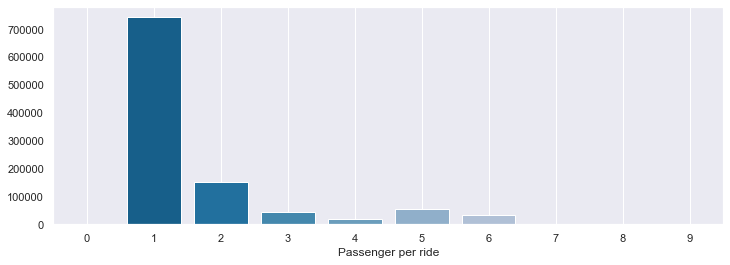

In [41]:
fig ,sub = plt.subplots(1,1,figsize=(12,4))

sns.barplot(x = df_train["passenger_count"].value_counts().index, y = df_train["passenger_count"].value_counts().values, ax= sub, palette="PuBu_r")
sub.grid()
sub.set_xlabel("Passenger per ride");

most of the rides are people taking a taxi alone


In [42]:
df_train.corr()['trip_duration']

vendor_id             0.017742
passenger_count       0.007149
pickup_longitude      0.040378
pickup_latitude      -0.026356
dropoff_longitude     0.021514
dropoff_latitude     -0.017984
store_and_fwd_flag    0.001437
trip_duration         1.000000
log_trip_duration     0.231740
year                       NaN
month                -0.000625
day                   0.001626
hour                  0.003473
minute               -0.002266
pickup_weekday        0.000974
pickup_weekofyear    -0.001076
distance_haversine    0.083945
Name: trip_duration, dtype: float64

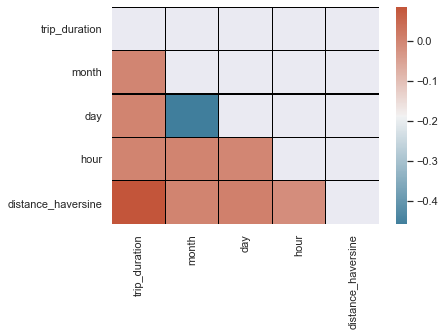

In [43]:
correlation = df_train[["trip_duration","month","day","hour","distance_haversine"]].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap=cmap, linecolor = "black",lw=0.09);

no linear relationship observable between the features

### Comparison between Test and Train data

#### Time

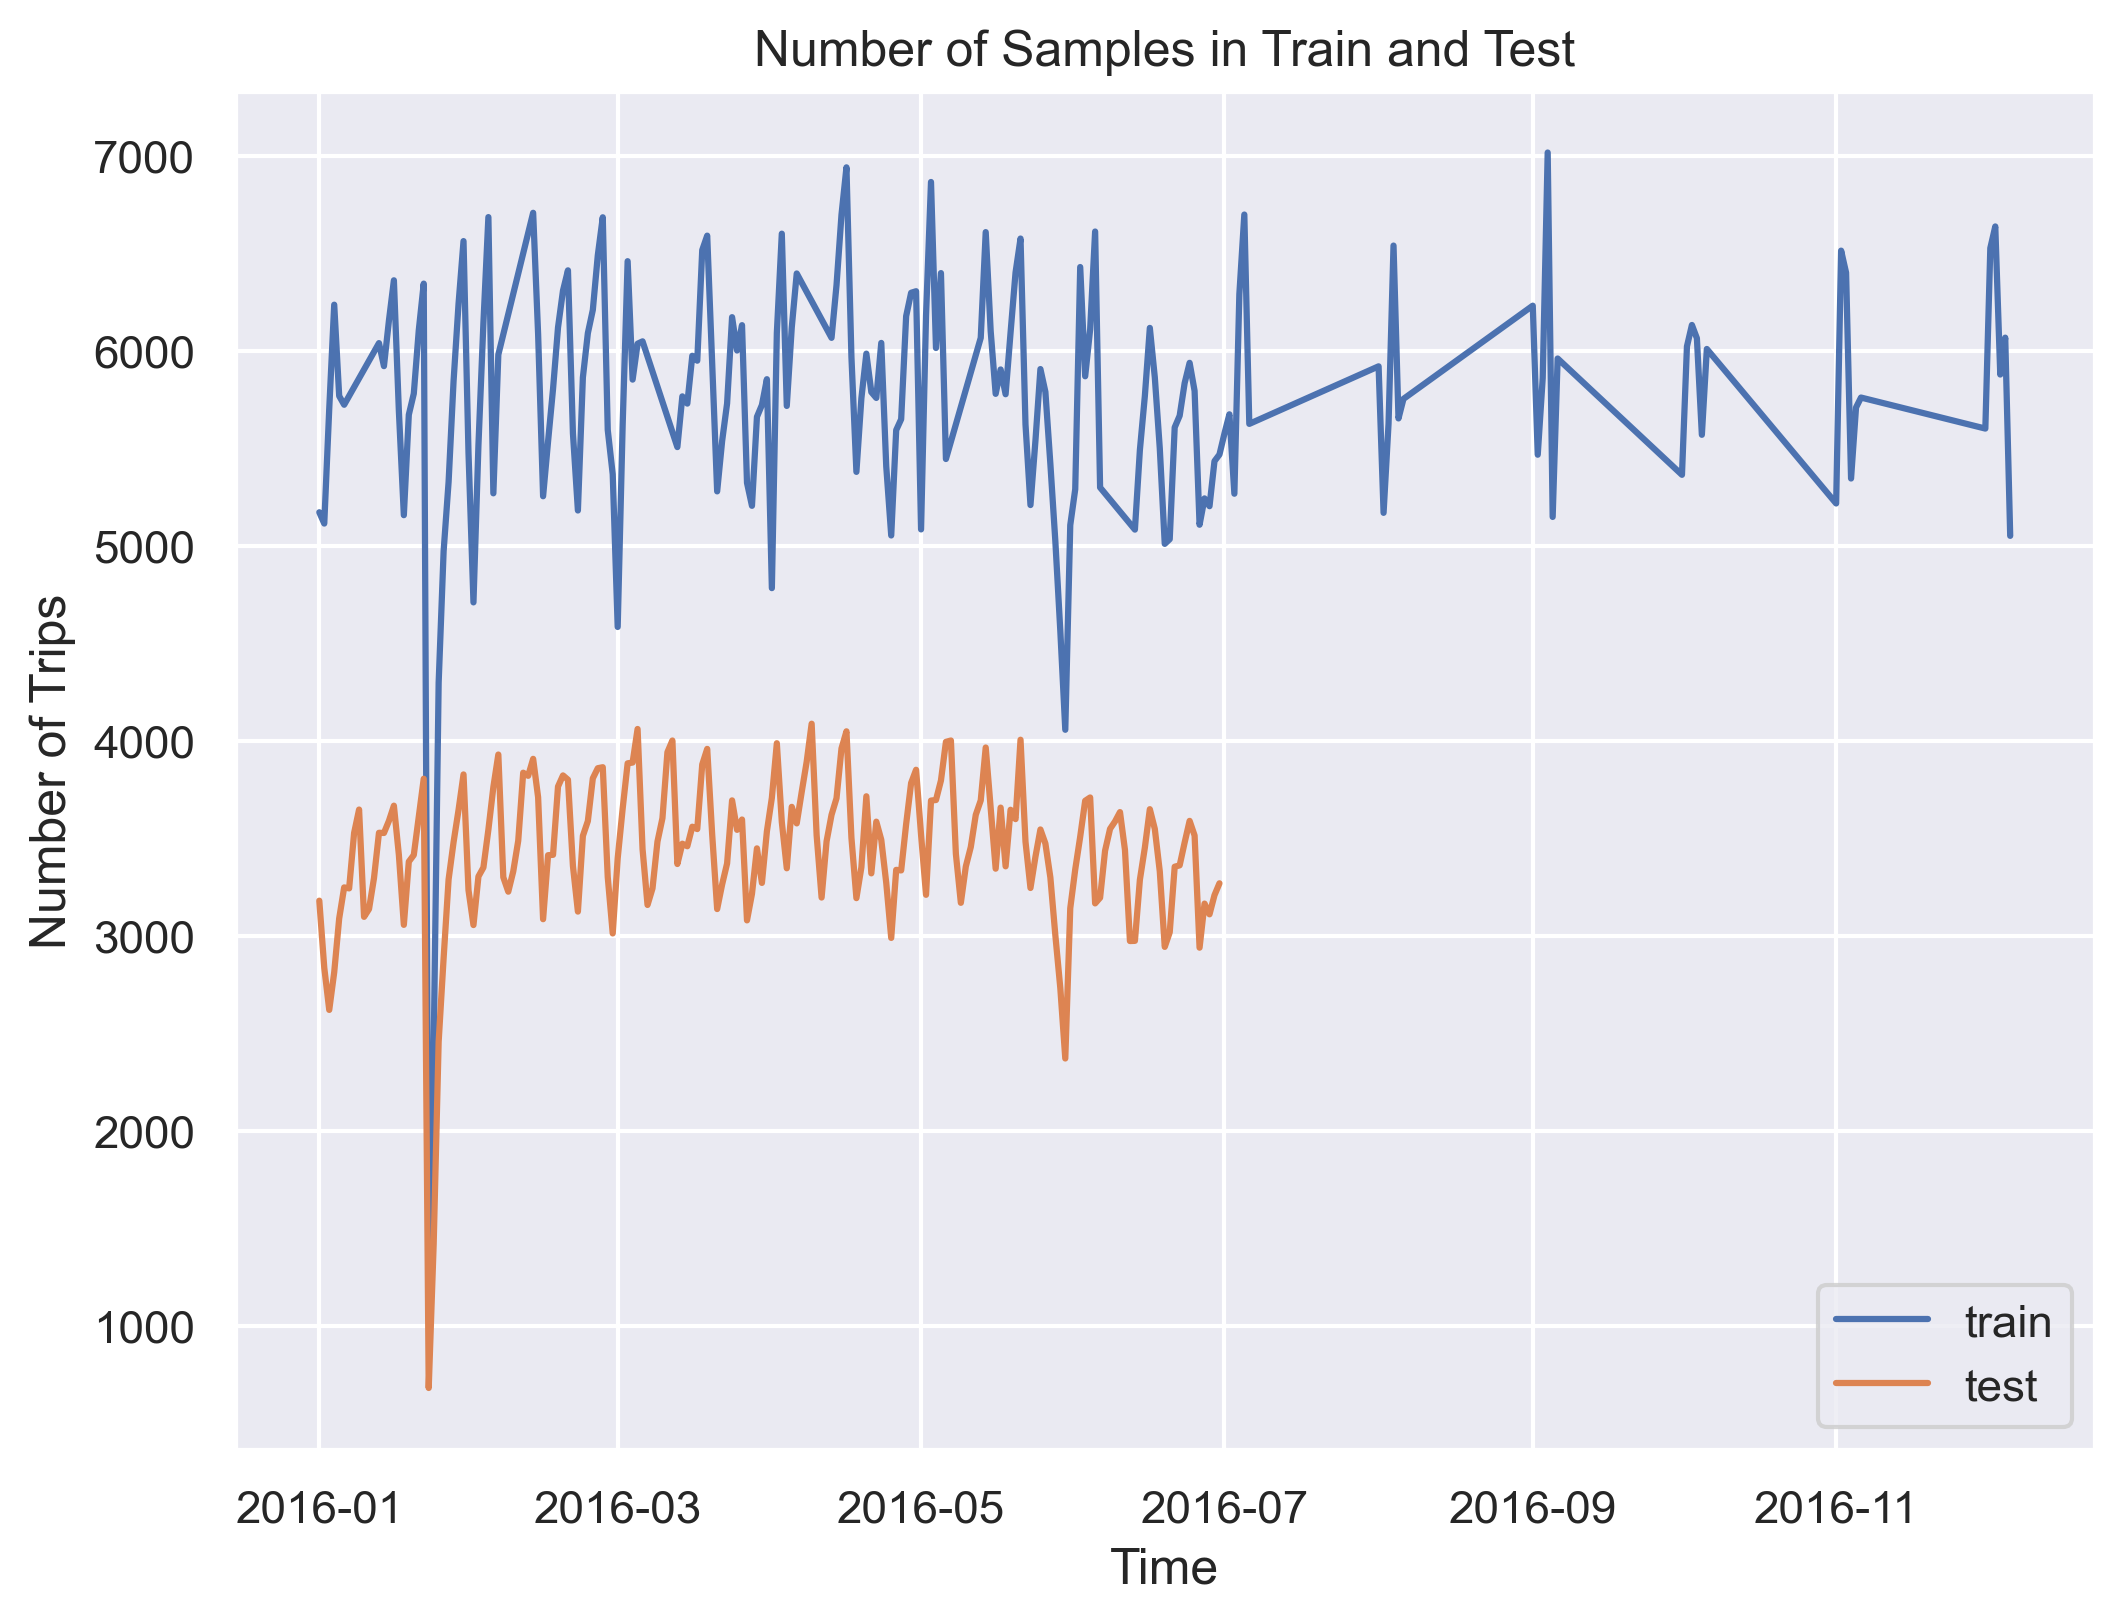

In [44]:
figure(figsize=(8, 6), dpi=300)
plt.plot(df_train.groupby('pickup_date')[['id']].count(), label='train')
plt.plot(df_test.groupby('pickup_date')[['id']].count(), label='test')
plt.title('Number of Samples in Train and Test')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('Number of Trips')
plt.show()

#### Geolocaton

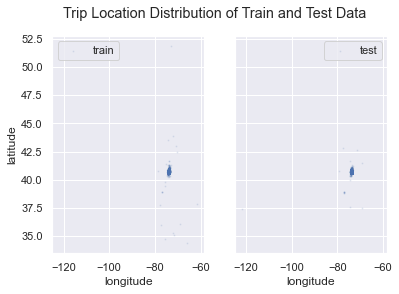

In [45]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values, df_train['pickup_latitude'].values,
              s=1, label='train', alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values, df_test['pickup_latitude'].values,
              s=1, label='test', alpha=0.1)
fig.suptitle('Trip Location Distribution of Train and Test Data')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.show()

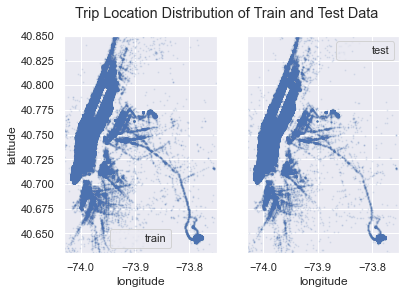

In [46]:
#Let's zoom in to the city and see the difference.

long_lim = (-74.03, -73.75)
lat_lim = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values, df_train['pickup_latitude'].values,
              s=1, label='train', alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values, df_test['pickup_latitude'].values,
              s=1, label='test', alpha=0.1)
fig.suptitle('Trip Location Distribution of Train and Test Data')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.xlim(long_lim)
plt.ylim(lat_lim)
plt.show()

It looks like train and test data are completely overlapped based off time and geolocation distribution.



# Step 5: Description of ML Model

In [47]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'log_trip_duration', 'year', 'month', 'day', 'hour',
       'minute', 'pickup_date', 'pickup_weekday', 'pickup_weekofyear',
       'distance_haversine'],
      dtype='object')

In [48]:
np.setdiff1d(df_train.columns, df_test.columns)

array(['dropoff_datetime', 'log_trip_duration', 'trip_duration'],
      dtype=object)

In [49]:
features = [column for column in df_train.columns if column not in ['avg_speed_h', 'dropoff_datetime', 'log_trip_duration',\
                                                  'trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime',\
                                                  'distance_haversine',\
                                                 'trip_duration', 'log_trip_duration', 'trip_duration','pickup_date']]

In [50]:
features

['vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'pickup_weekday',
 'pickup_weekofyear']

In [51]:
len(features)

14

In [52]:
df_train_filter = df_train.dropna()

X = df_train_filter[features].values
y = np.log(df_train_filter['trip_duration'].values + 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = df_test[features].values

In [53]:
df_train_filter.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,log_trip_duration,year,month,day,hour,minute,pickup_date,pickup_weekday,pickup_weekofyear,distance_haversine
0,id2875421,2,2016-03-14 17:24:00,2016-03-14 17:32:00,1,-73.982155,40.767937,-73.964630,40.765602,0,...,6.122493,2016,3,14,17,24,2016-03-14,0,11,1.498521
1,id2377394,1,2016-12-06 00:43:00,2016-12-06 00:54:00,1,-73.980415,40.738564,-73.999481,40.731152,0,...,6.498282,2016,12,6,0,43,2016-12-06,1,49,1.805508
2,id3858529,2,2016-01-19 11:35:00,2016-01-19 12:10:00,1,-73.979027,40.763939,-74.005333,40.710087,0,...,7.661527,2016,1,19,11,35,2016-01-19,1,3,6.385099
3,id3504673,2,2016-06-04 19:32:00,2016-06-04 19:39:00,1,-74.010040,40.719971,-74.012268,40.706718,0,...,6.063785,2016,6,4,19,32,2016-06-04,5,22,1.485499
4,id2181028,2,2016-03-26 13:30:00,2016-03-26 13:38:00,1,-73.973053,40.793209,-73.972923,40.782520,0,...,6.077642,2016,3,26,13,30,2016-03-26,5,12,1.188589


# Logistic Regression Classifier

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_reg = LogisticRegression()

In [56]:
log_reg.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

### Data Prediction

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
y_pred

### Performance Matrix

In [ ]:
rmsle = np.sqrt(sum(np.square(y_pred - y_val)) / len(y_pred))
print("rmsle of decision tree is: %.3f"%rmsle)

### Submission

In [ ]:
# submission
y_test = log_reg.predict(X_test)
df_test['trip_duration'] = np.exp(y_test) - 1
df_test[['id', 'trip_duration']].to_csv('LogReg_submission.csv', index=False)

# K Nearest Neighbor (KNN) Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.fit(X_train, y_train)

### Data Prediction

In [ ]:
y_pred = knn.predict(X_val)

In [ ]:
y_pred

### Performance Matrix

In [ ]:
rmsle = np.sqrt(sum(np.square(y_pred - y_val)) / len(y_pred))
print("rmsle of decision tree is: %.3f"%rmsle)

### Submission

In [ ]:
# submission
y_test = knn.predict(X_test)
df_test['trip_duration'] = np.exp(y_test) - 1
df_test[['id', 'trip_duration']].to_csv('knn_submission.csv', index=False)